In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
aorta_test_df = pd.read_csv('aortaP_test_data.csv')
aorta_train_df = pd.read_csv('aortaP_train_data.csv')
brach_test_df = pd.read_csv('brachP_test_data.csv')
brach_train_df = pd.read_csv('brachP_train_data.csv')

Extract the target column to be our "y"

In [3]:
y = aorta_train_df.target

In [4]:
type(y)

pandas.core.series.Series

We want to build up a X_df made up of the coefficients of the linear regressions of each patients' pressure time-series.  These will be 3 per measurement location, a_x2, a_x, a_intercept, b_x2, b_x, and b_intercept.

X should be an array from 0 to 335

In [5]:
X = np.arange(0,336)

In [6]:
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Now, build a DataFrame row by row

In [7]:
patient = np.arange(0,3499)

In [8]:
X_df = pd.DataFrame(columns=['a_x3','a_x2','a_x','a_intercept','b_x3','b_x2','b_x','b_intercept'],index=patient)

In [9]:
X_df.loc[0]

a_x3           NaN
a_x2           NaN
a_x            NaN
a_intercept    NaN
b_x3           NaN
b_x2           NaN
b_x            NaN
b_intercept    NaN
Name: 0, dtype: object

In [10]:
for i in patient:
    X_df.loc[i][['a_x3','a_x2','a_x','a_intercept']] = np.polyfit(X,pd.DataFrame(aorta_train_df.iloc[i][1:-1].to_numpy()).interpolate(limit_direction='both').values.ravel().tolist(),3)
    X_df.loc[i][['b_x3','b_x2','b_x','b_intercept']] = np.polyfit(X,pd.DataFrame(brach_train_df.iloc[i][1:-1].to_numpy()).interpolate(limit_direction='both').values.ravel().tolist(),3)
    #print(i)

In [11]:
X_df

,a_x3,a_x2,a_x,a_intercept,b_x3,b_x2,b_x,b_intercept
0,0.000006,-0.00383,0.660188,67.648728,0.000011,-0.0061,0.859049,73.224466
1,0.000005,-0.003093,0.544938,83.668701,0.000007,-0.003829,0.548592,93.236268
2,0.000005,-0.003206,0.531056,81.797486,0.000008,-0.004552,0.622931,88.051353
3,0.000004,-0.002962,0.562921,75.773419,0.000007,-0.004088,0.620993,83.898281
4,0.000004,-0.002605,0.403661,73.434631,0.000006,-0.003043,0.403788,79.057687
...,...,...,...,...,...,...,...,...
3494,0.000004,-0.002554,0.464389,83.986462,0.000007,-0.003975,0.585143,88.680087
3495,0.000008,-0.005175,0.827421,83.809948,0.00001,-0.005674,0.790379,93.658896
3496,0.000004,-0.002495,0.438248,82.169199,0.000007,-0.003957,0.55751,87.130771
3497,0.000007,-0.004275,0.656633,81.34049,0.000008,-0.004456,0.586217,91.576827


In [12]:
y

0       0
1       0
2       1
3       5
4       0
       ..
3494    0
3495    4
3496    1
3497    3
3498    3
Name: target, Length: 3499, dtype: int64

# Random Forrest of Decision Trees - Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

In [15]:
age_from_category = {
    0: 25,
    1: 35,
    2: 45,
    3: 55,
    4: 65,
    5: 75
}

In [16]:
y_age = y.map(age_from_category)

In [17]:
regressor.fit(X_df, y_age)

RandomForestRegressor(random_state=0)

In [18]:
y_pred = regressor.predict(X_df)

In [38]:
f = lambda x: x // 10 -2

In [20]:
y_pred_age = f(y_pred)

In [21]:
y_pred_age

array([0., 1., 1., ..., 1., 3., 3.])

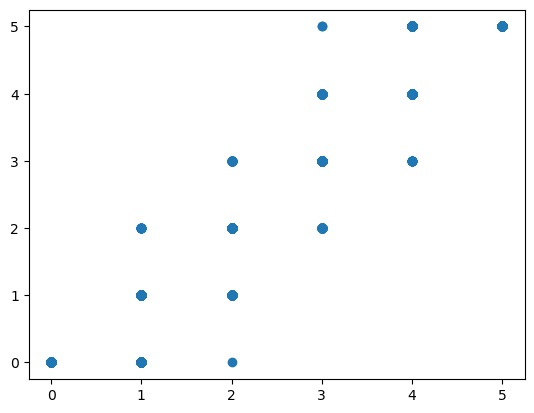

In [22]:
plt.scatter(y_pred_age,y)

In [23]:
pd.crosstab(y_pred_age,y)

target,0,1,2,3,4,5
row_0,,,,,,
0.0,438,0,0,0,0,0
1.0,143,477,19,0,0,0
2.0,1,106,501,48,0,0
3.0,0,0,73,518,104,2
4.0,0,0,0,16,472,149
5.0,0,0,0,0,0,432


In [24]:
438+477+501+518+472+432

2838

9 outliers classes and 2838 correct matches

In [25]:
2838 / len(patient)

0.8110888825378679

In [26]:
1- ((1 + 2 ) / len(patient))

0.9991426121749071

# Process Test Data

In [27]:
test_patients = np.arange(0,875)

In [28]:
X_test_df = pd.DataFrame(columns=['a_x3','a_x2','a_x','a_intercept','b_x3','b_x2','b_x','b_intercept'],index=test_patients)

In [29]:
for i in test_patients:
    X_test_df.loc[i][['a_x3','a_x2','a_x','a_intercept']] = np.polyfit(X,pd.DataFrame(aorta_test_df.iloc[i][1:].to_numpy()).interpolate(limit_direction='both').values.ravel().tolist(),3)
    X_test_df.loc[i][['b_x3','b_x2','b_x','b_intercept']] = np.polyfit(X,pd.DataFrame(brach_test_df.iloc[i][1:].to_numpy()).interpolate(limit_direction='both').values.ravel().tolist(),3)
    #print(i)

In [30]:
y_test_pred = regressor.predict(X_test_df)

In [41]:
y_test_pred_age = f(y_test_pred).astype(int)

In [42]:
y_test_pred_age

array([4, 1, 1, 4, 1, 2, 3, 0, 5, 2, 1, 3, 0, 3, 0, 1, 2, 2, 1, 4, 4, 2,
       1, 2, 0, 3, 2, 1, 3, 0, 2, 1, 3, 4, 3, 1, 4, 3, 1, 3, 0, 0, 3, 1,
       2, 1, 5, 1, 4, 3, 2, 1, 5, 2, 4, 4, 1, 0, 1, 4, 1, 2, 0, 2, 0, 4,
       1, 2, 4, 2, 0, 4, 1, 3, 1, 4, 1, 3, 2, 0, 2, 4, 4, 3, 5, 1, 2, 2,
       0, 2, 1, 2, 2, 1, 3, 4, 2, 3, 5, 3, 1, 4, 3, 1, 1, 2, 4, 1, 3, 1,
       4, 3, 4, 5, 2, 0, 2, 4, 2, 2, 3, 2, 1, 4, 1, 3, 0, 2, 3, 2, 4, 5,
       3, 4, 3, 1, 1, 4, 2, 4, 3, 3, 2, 3, 1, 1, 2, 3, 1, 4, 0, 1, 1, 5,
       2, 3, 2, 3, 4, 4, 3, 3, 2, 1, 3, 1, 2, 2, 3, 0, 4, 4, 0, 5, 0, 2,
       3, 4, 3, 1, 1, 3, 4, 4, 3, 4, 3, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 4,
       3, 4, 1, 1, 1, 3, 4, 1, 4, 2, 0, 0, 1, 3, 4, 2, 3, 1, 2, 3, 1, 3,
       3, 2, 0, 2, 3, 4, 3, 3, 3, 2, 1, 2, 3, 2, 1, 3, 1, 3, 1, 5, 2, 2,
       2, 4, 4, 2, 3, 3, 4, 0, 1, 4, 1, 2, 2, 1, 2, 3, 4, 1, 2, 0, 2, 3,
       3, 2, 4, 2, 0, 3, 4, 4, 2, 4, 5, 3, 1, 3, 3, 1, 2, 2, 1, 2, 1, 3,
       4, 2, 3, 3, 3, 4, 2, 3, 5, 1, 1, 1, 4, 1, 4,

In [114]:
print("{")
for p in test_patients:
    if p < 874:
        print(f"\t{p}: {y_test_pred_age[p]},")
    else:
        print(f"\t{p}: {y_test_pred_age[p]}")
print("}")

{
	0: 4,
	1: 1,
	2: 1,
	3: 4,
	4: 1,
	5: 2,
	6: 3,
	7: 0,
	8: 5,
	9: 2,
	10: 1,
	11: 3,
	12: 0,
	13: 3,
	14: 0,
	15: 1,
	16: 2,
	17: 2,
	18: 1,
	19: 4,
	20: 4,
	21: 2,
	22: 1,
	23: 2,
	24: 0,
	25: 3,
	26: 2,
	27: 1,
	28: 3,
	29: 0,
	30: 2,
	31: 1,
	32: 3,
	33: 4,
	34: 3,
	35: 1,
	36: 4,
	37: 3,
	38: 1,
	39: 3,
	40: 0,
	41: 0,
	42: 3,
	43: 1,
	44: 2,
	45: 1,
	46: 5,
	47: 1,
	48: 4,
	49: 3,
	50: 2,
	51: 1,
	52: 5,
	53: 2,
	54: 4,
	55: 4,
	56: 1,
	57: 0,
	58: 1,
	59: 4,
	60: 1,
	61: 2,
	62: 0,
	63: 2,
	64: 0,
	65: 4,
	66: 1,
	67: 2,
	68: 4,
	69: 2,
	70: 0,
	71: 4,
	72: 1,
	73: 3,
	74: 1,
	75: 4,
	76: 1,
	77: 3,
	78: 2,
	79: 0,
	80: 2,
	81: 4,
	82: 4,
	83: 3,
	84: 5,
	85: 1,
	86: 2,
	87: 2,
	88: 0,
	89: 2,
	90: 1,
	91: 2,
	92: 2,
	93: 1,
	94: 3,
	95: 4,
	96: 2,
	97: 3,
	98: 5,
	99: 3,
	100: 1,
	101: 4,
	102: 3,
	103: 1,
	104: 1,
	105: 2,
	106: 4,
	107: 1,
	108: 3,
	109: 1,
	110: 4,
	111: 3,
	112: 4,
	113: 5,
	114: 2,
	115: 0,
	116: 2,
	117: 4,
	118: 2,
	119: 2,
	120: 3,
	121: 2,
	122: 1,
	